#### The goal of this notebook is to obtain the figure 4 of the paper

In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
N_param = np.load('parameters_arrays/N_param.npy')
H = np.load('parameters_arrays/H.npy')

train_squared_loss = np.zeros(H.shape[0])
test_squared_loss = np.zeros(H.shape[0])
train_zero_one_loss = np.zeros(H.shape[0])
test_zero_one_loss = np.zeros(H.shape[0])

In [132]:
print(N_param)

[  3000.   4000.   7000.  10000.  20000.  25000.  27000.  29000.  31000.
  32000.  33000.  34000.  35000.  37000.  39000.  40000.  42000.  45000.
  50000.  55000.  70000. 200000. 250000. 800000.]


In [133]:
print(H)

[   4    5    9   13   25   31   34   36   39   40   41   43   44   47
   49   50   53   57   63   69   88  252  314 1006]


#### Here we do a plot for only one run

A run is a training of all models to do the figure 4 but only one time. We do not repeat the procedure to get averaged results.

Select here the run you want to see

In [134]:
run = 0

In [135]:

for i in range(H.shape[0]):
    train_squared_loss_numpy=np.load(f'runs_saved/run{run}/H{H[i]}/train_squared_loss_numpy.npy')
    test_squared_loss_numpy=np.load(f'runs_saved/run{run}/H{H[i]}/val_squared_loss_numpy.npy')
    train_zero_one_loss_numpy=np.load(f'runs_saved/run{run}/H{H[i]}/train_zero_one_loss_numpy.npy')
    test_zero_one_loss_numpy=np.load(f'runs_saved/run{run}/H{H[i]}/val_zero_one_loss_numpy.npy')
    train_squared_loss[i]=train_squared_loss_numpy[-1]
    test_squared_loss[i]=test_squared_loss_numpy[-1]
    train_zero_one_loss[i]=train_zero_one_loss_numpy[-1]
    test_zero_one_loss[i]=test_zero_one_loss_numpy[-1]

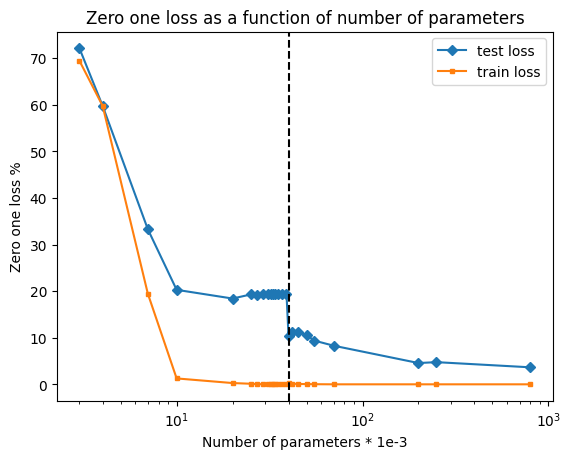

In [136]:
plt.figure()
plt.title('Zero one loss as a function of number of parameters')
plt.plot(N_param * 1e-3, test_zero_one_loss * 100, '-D' , markersize=5)
plt.plot(N_param * 1e-3, train_zero_one_loss * 100, '-s', markersize=3)
plt.xlabel('Number of parameters * 1e-3')
plt.xscale("log")
plt.ylabel('Zero one loss %')
plt.axvline(40, label="best epoch", color="k", ls="--")
plt.legend(['test loss', 'train loss'])
plt.show()

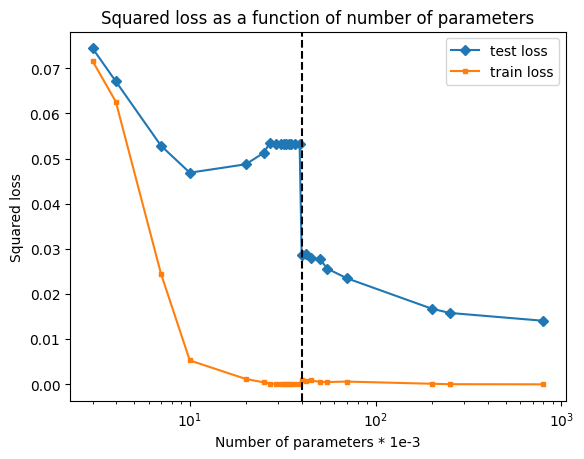

In [137]:
plt.figure()
plt.title('Squared loss as a function of number of parameters')
plt.plot(N_param * 1e-3, test_squared_loss, '-D', markersize=5)
plt.plot(N_param * 1e-3, train_squared_loss, '-s', markersize=3)
plt.xlabel('Number of parameters * 1e-3')
plt.xscale("log")
plt.ylabel('Squared loss')
plt.axvline(40, label="best epoch", color="k", ls="--")
plt.legend(['test loss', 'train loss'])
plt.show()

#### Here we do a plot averaged between multiple runs

Select here the runs to be averaged

In [138]:
run = [0, 1]

In [139]:
train_squared_loss_array = np.zeros([H.shape[0],len(run)])
test_squared_loss_array = np.zeros([H.shape[0],len(run)])
train_zero_one_loss_array = np.zeros([H.shape[0],len(run)])
test_zero_one_loss_array = np.zeros([H.shape[0],len(run)])

for run_ in run:
    for i in range(H.shape[0]):
        train_squared_loss_numpy = np.load(f'runs_saved/run{run_}/H{H[i]}/train_squared_loss_numpy.npy')
        test_squared_loss_numpy = np.load(f'runs_saved/run{run_}/H{H[i]}/val_squared_loss_numpy.npy')
        train_zero_one_loss_numpy = np.load(f'runs_saved/run{run_}/H{H[i]}/train_zero_one_loss_numpy.npy')
        test_zero_one_loss_numpy = np.load(f'runs_saved/run{run_}/H{H[i]}/val_zero_one_loss_numpy.npy')

        train_squared_loss_array[i, run_] = train_squared_loss_numpy[-1]
        test_squared_loss_array[i, run_]=test_squared_loss_numpy[-1]
        train_zero_one_loss_array[i, run_]=train_zero_one_loss_numpy[-1]
        test_zero_one_loss_array[i, run_]=test_zero_one_loss_numpy[-1]

train_squared_loss_average = np.mean(train_squared_loss_array, axis = 1)
test_squared_loss_average = np.mean(test_squared_loss_array, axis = 1)
train_zero_one_loss_average = np.mean(train_zero_one_loss_array, axis = 1)
test_zero_one_loss_average = np.mean(test_zero_one_loss_array, axis = 1)

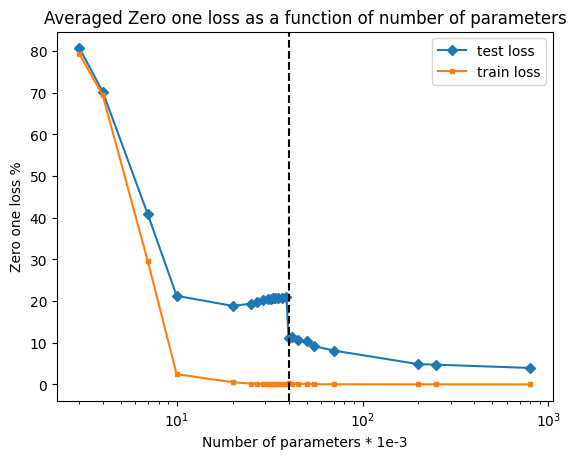

In [140]:
plt.figure()
plt.title('Averaged Zero one loss as a function of number of parameters')
plt.plot(N_param * 1e-3, test_zero_one_loss_average * 100, '-D' , markersize=5)
plt.plot(N_param * 1e-3, train_zero_one_loss_average * 100, '-s', markersize=3)
plt.xlabel('Number of parameters * 1e-3')
plt.xscale("log")
plt.ylabel('Zero one loss %')
plt.axvline(40, label="best epoch", color="k", ls="--")
plt.legend(['test loss', 'train loss'])
plt.show()

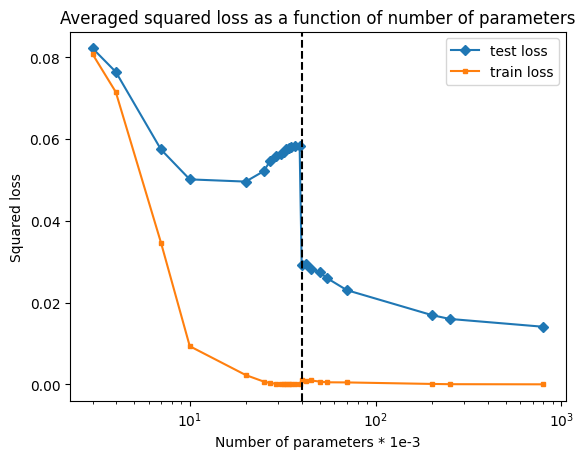

In [141]:
plt.figure()
plt.title('Averaged squared loss as a function of number of parameters')
plt.plot(N_param * 1e-3, test_squared_loss_average, '-D' , markersize=5)
plt.plot(N_param * 1e-3, train_squared_loss_average, '-s', markersize=3)
plt.xlabel('Number of parameters * 1e-3')
plt.xscale("log")s
plt.ylabel('Squared loss')
plt.axvline(40, label="best epoch", color="k", ls="--")
plt.legend(['test loss', 'train loss'])
plt.show()